In [29]:
from sklearn import datasets
from sklearn.model_selection import train_test_split

from sklearn.decomposition import NMF
import matplotlib.pyplot as plt

In [30]:
# 데이터 불러오기
raw_face = datasets.fetch_lfw_people(min_faces_per_person = 20, resize = 0.5, color = False)    # 데이터 셋 이름 = fetch_lfw_people

In [31]:
# 데이터 살펴보기
n_samples, h, w = raw_face.images.shape           # raw_face.images : 얼굴을 사각형 행렬로 표현하는 형태
print(n_samples)                                  # 총 얼굴 개수
print(h)                                          # 얼굴 데이터 하나의 높이
print(w)                                          # 얼굴 데이터 하나의 가로 길이


1263
62
47


In [32]:
# raw_face.data : 얼굴 데이터 행렬을 일렬로 늘어뜨려 하나의 행으로 표현하는 방법
x = raw_face.data                                 # X의 차원 = n x p
n, p = x.shape                                    
print(n)                                          # 행 수(n) = 얼굴 데이터의 개수
print(p)                                          # 열 개수(p) = 62 x 47 = 2914, 일렬로 늘어트린 개수

# 피처의 차원이 2914로 고차원 데이터에 해당 -> 차원 축소 필요!

1263
2914


In [33]:
y = raw_face.target
target_names = raw_face.target_names
k = target_names.shape[0]                         # 타깃 데이터의 클래수 개수
print(k)

15


In [34]:
# 트레이닝 / 테스트 데이터 분할
x_tn, x_te, y_tn, y_te = train_test_split(x, y, random_state = 1)

In [35]:
# 비음수 행렬 분해
nmf = NMF(n_components = 10, random_state = 0)      # 비음수 행렬 분해를 설정하는데, 2914차원의 데이터를 10차원으로 줄이기
nmf.fit(x_tn)                                       # 설정한 모형에 트레이닝 피처 데이터 적합
x_tn_nmf = nmf.transform(x_tn)                      # 트레이닝 데이터를 비음수 행렬 분해
x_te_nmf = nmf.transform(x_te)                      # 테스트 데이터를 비음수 행렬 분해

/usr/local/anaconda3/envs/py385/lib/python3.8/site-packages/sklearn/decomposition/_nmf.py:312: FutureWarning: The 'init' value, when 'init=None' and n_components is less than n_samples and n_features, will be changed from 'nndsvd' to 'nndsvda' in 1.1 (renaming of 0.26).
  warnings.warn(("The 'init' value, when 'init=None' and "
/usr/local/anaconda3/envs/py385/lib/python3.8/site-packages/sklearn/decomposition/_nmf.py:1090: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  warnings.warn("Maximum number of iterations %d reached. Increase it to"


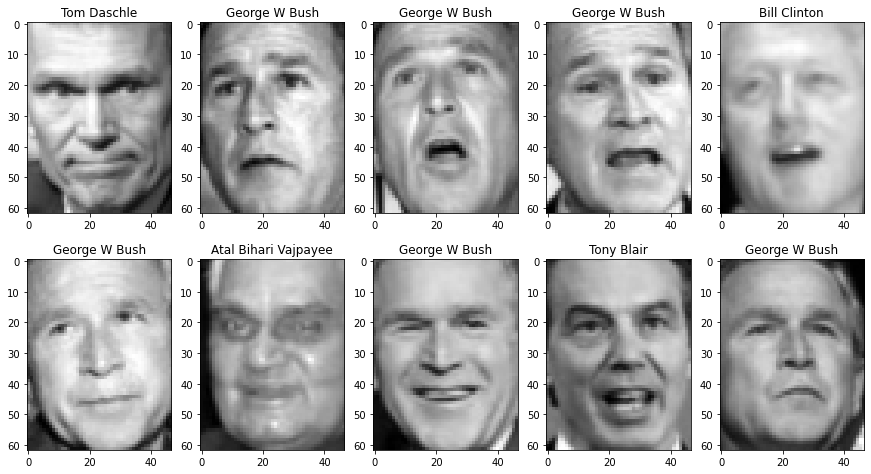

In [36]:
# 오리지널 데이터 시각화                           
plt.figure(figsize=(15, 8))                        # 각 그림의 사이즈 설정
plt.gray()                                         # 흑백으로 변경
for i in range(2*5):                                
    plt.subplot(2, 5, i+1)                         # 2행 5열의 형태로 나타나게 하기
    plt.imshow(x_tn[i].reshape((h,w)))             # 얼굴 데이터 그리기
    plt.title(target_names[y_tn[i]])               # 얼굴 데이터 제목 붙이기
plt.show()                                         

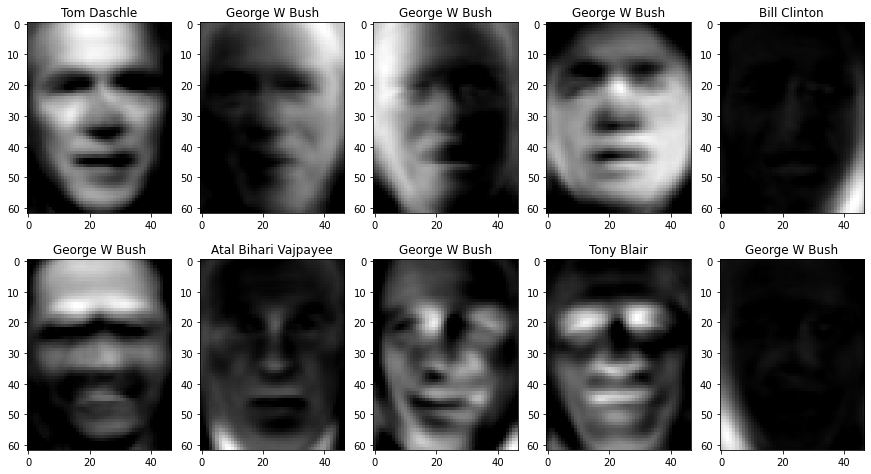

In [37]:
# 비음수 행렬 분해 적합 이후 시각화
plt.figure(figsize=(15, 8))
plt.gray()
for i in range(2*5):                                 # 10차원 벡터이므로 10개의 그림
    plt.subplot(2, 5, i+1)
    plt.imshow(nmf.components_[i].reshape((h,w)))
    plt.title(target_names[y_tn[i]])
plt.show()